<a href="https://colab.research.google.com/github/RajatSharma155/CNN-projects/blob/master/Lungs_Status%2C_Normal_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle_dataset - Lungs

In [1]:

# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajatsharma23","key":"e62838f8fc27216667cd13849c85efc2"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:37<00:00, 59.7MB/s]
100% 2.29G/2.29G [00:37<00:00, 66.4MB/s]


In [5]:
import zipfile
file_local = "chest-xray-pneumonia.zip"
zip_ref = zipfile.ZipFile(file_local, "r")
zip_ref.extractall()
print("Done")
zip_ref.close()

Done


In [1]:
import os
base_dir = '/content/chest_xray'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')


validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')


In [2]:
print('total training NORMAL images :', len(os.listdir( train_normal_dir ) ))
print('total training PNEUMONIA images :', len(os.listdir( train_pneumonia_dir) ))

print('total validation NORMAL images :', len(os.listdir(validation_normal_dir) ))
print('total validation PNEUMONIA images :', len(os.listdir(validation_pneumonia_dir) ))

total training NORMAL images : 1341
total training PNEUMONIA images : 3875
total validation NORMAL images : 234
total validation PNEUMONIA images : 390


In [3]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 5
ncols = 5

pic_index = 0 

In [4]:
train_normal_fnames = os.listdir( train_normal_dir )
train_pneumonia_fnames = os.listdir( train_pneumonia_dir )

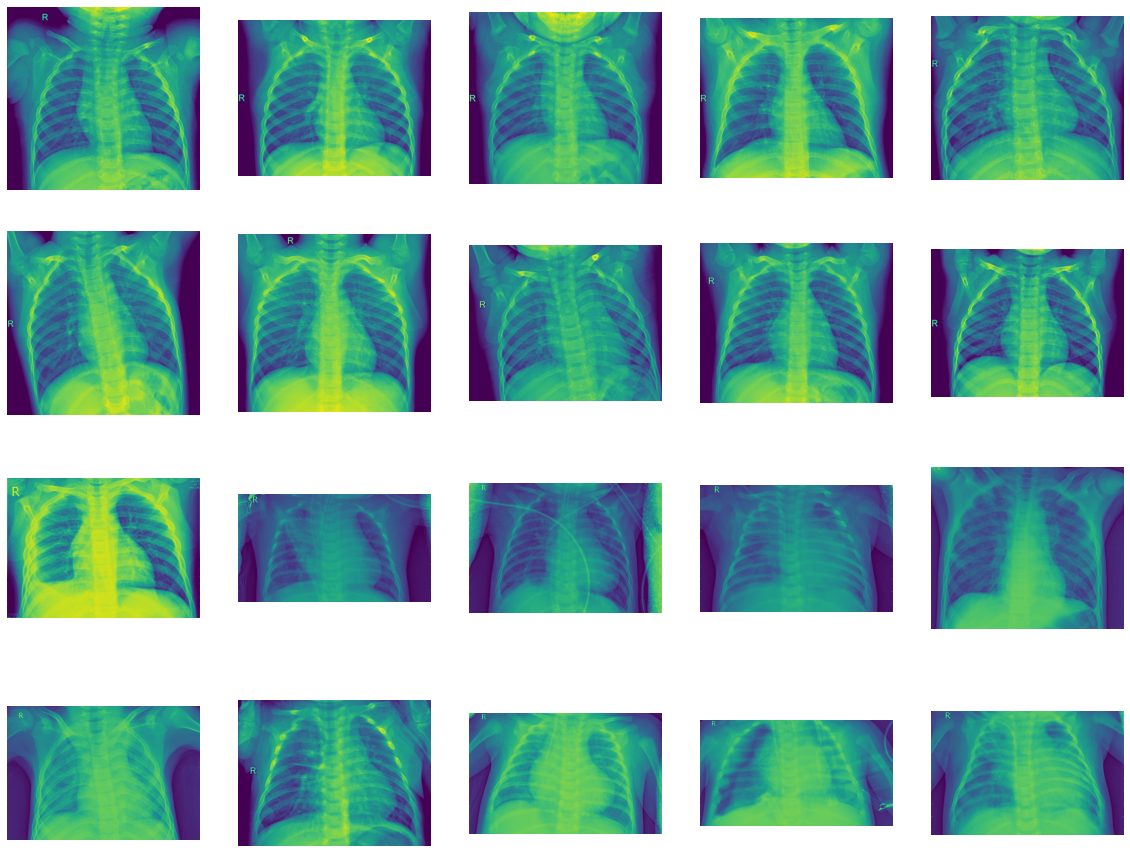

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=10

next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_fnames[ pic_index-10:pic_index] 
               ]

next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname) 
                for fname in train_pneumonia_fnames[ pic_index-10:pic_index]
               ]

for i, img_path in enumerate(next_normal_pix+next_pneumonia_pix):
  
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [6]:
import os
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 180x180 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(180, 180, 3)),
    # The second convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The third convolution
    tf.keras.layers.SeparableConv2D(32, (3,3), activation='relu'),
    # The fourth convolution
    tf.keras.layers.SeparableConv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fifth convolution
    tf.keras.layers.SeparableConv2D(64, (3,3), activation='relu'),
    # The sixth convolution
    tf.keras.layers.SeparableConv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    # The seventh convolution
    tf.keras.layers.SeparableConv2D(128, (3,3), activation='relu'),
    tf.keras.layers.SeparableConv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
   
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 176, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 16)        0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 86, 86, 32)        688       
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 84, 84, 32)        1344      
_________________________________________________________________
batch_normalization (BatchNo (None, 84, 84, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 32)        0

In [8]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255., height_shift_range = 0.2,
                                   width_shift_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    class_mode='binary',
                                                    target_size=(180, 180))     


validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=16,
                                                         class_mode  = 'binary',
                                                         target_size = (180, 180))

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [11]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=len(train_generator)/16,
                              epochs=100,
                              validation_steps=len(validation_generator)/16,
                              verbose=2,
                              callbacks = [lr_scheduler])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
21/20 - 6s - loss: 0.7696 - accuracy: 0.6310 - val_loss: 3.6877 - val_accuracy: 0.3958 - lr: 0.0100
Epoch 2/100
21/20 - 6s - loss: 0.5895 - accuracy: 0.7113 - val_loss: 0.8847 - val_accuracy: 0.6250 - lr: 0.0089
Epoch 3/100
21/20 - 7s - loss: 0.5285 - accuracy: 0.7440 - val_loss: 1.8127 - val_accuracy: 0.5625 - lr: 0.0079
Epoch 4/100
21/20 - 7s - loss: 0.4568 - accuracy: 0.7768 - val_loss: 3.2067 - val_accuracy: 0.6875 - lr: 0.0071
Epoch 5/100
21/20 - 6s - loss: 0.4245 - accuracy: 0.7946 - val_loss: 1.2055 - val_accuracy: 0.6042 - lr: 0.0063
Epoch 6/100
21/20 - 6s - loss: 0.4499 - accuracy: 0.7917 - val_loss: 1.7323 - val_accuracy: 0.7083 - lr: 0.0056
Epoch 7/100
21/20 - 7s - loss: 0.4044 - accuracy: 0.8244 - val_loss: 2.9489 - val_accuracy: 0.6042 - lr: 0.0050
Epoch 8/100
21/20 - 7s - loss: 0.4598 - accuracy: 0.7976 - val_loss: 1.3550 - val_accuracy: 0.5833 - lr: 0.0045
Epoch 9/100
21/20 - 7s - los

In [12]:
scores = model.evaluate_generator(validation_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Instructions for updating:
Please use Model.evaluate, which supports generators.

accuracy: 84.13%


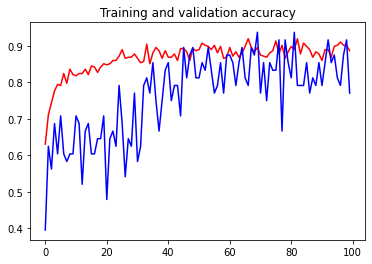

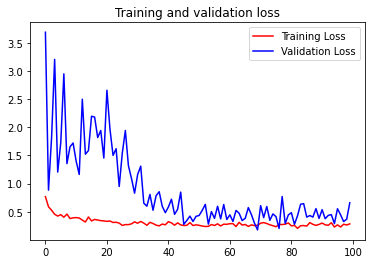

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()